まず必要なライブラリーをインポートします。

In [1]:
from quel_inst_tool import Ms2720t, InstDevManager, Ms2720tTraceMode
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

MS2720Tを制御するクラスMS2720Tのインスタンスを作ります。社内のネットワークにMS2720Tがつながっていることが前提です。

In [2]:
im = InstDevManager(ivi="@py")
dev = im.lookup(prod_id="MS2720T")
ms2720t = Ms2720t(dev)

Ms2720t.continuous_sweepをTrueに設定すると，連続的にスイープしたまま操作が可能です。

In [3]:
ms2720t.continuous_sweep = True  # この状態でtrace_and_peak_getを行うと強制的にtrace_modeはNORMになる。
ms2720t.freq_range_set(9e9, 5e9)  # freq_range_setの第１引き数は中心周波数で，第２はスパンです。
ms2720t.resolution_bandwidth = 1e5
ms2720t.average_enable = False  # 1sweep data の時はaverage_enableをFalseにしてください。　


Ms2720t.init_contをTrueのままMs2720t.trace_and_peak_getで連続スイープ状態でデータ取得します。

In [4]:
fd, pk = ms2720t.trace_and_peak_get(minimum_power=-40.0)  # 引き数のminimum powerはpeak探索時にそれ以下のpeakは無視するという意味です。

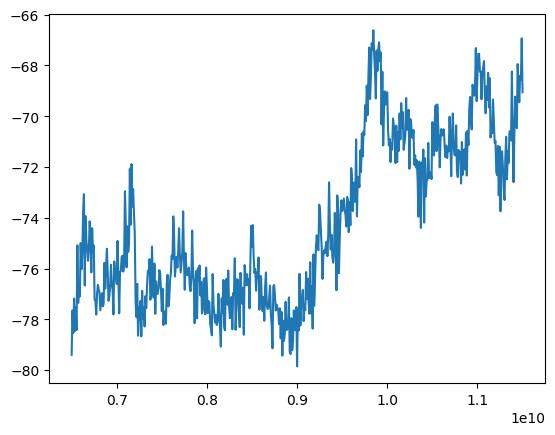

In [5]:
plt.plot(fd[:, 0], fd[:, 1])  # 取得Traceのプロット

1 sweep分のデータの取得の仕方です。average_countやaverage_enableの書き込みには注意が必要です。trace_modeを指定してから，average_countを更新したり，average_enable=Trueとすると，勝手にtrace_modeがaverageモードに変わってしまいます。アベレージモードについては後述します。この場合，continuous_sweepをFalseにする必要があります。

In [6]:
ms2720t.continuous_sweep = False  #連続sweep状態をstop 
ms2720t.trace_mode = Ms2720tTraceMode.NORM  # 1sweep データ取得するときのTrace Modeの設定
ms2720t.freq_range_set(9e9, 5e9)  # freq_range_setの第１引き数は中心周波数で，第２はスパンです。
ms2720t.resolution_bandwidth = 1e5
ms2720t.average_enable = False  # 1sweep data の時はaverage_enableをFalseにしてください。　
fd, pk = ms2720t.trace_and_peak_get(minimum_power=-40.0)  # 引き数のminimum powerはpeak探索時にそれ以下のpeakは無視するという意味です。

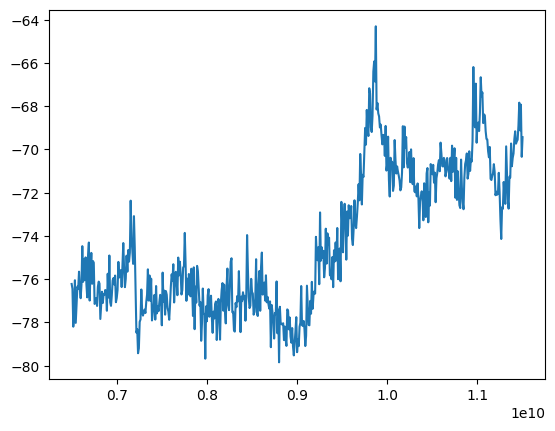

In [7]:
plt.plot(fd[:, 0], fd[:, 1])  # 取得Traceのプロット

In [8]:
pk  # ピーク値の最大値が-40dBになっているので，取得したピークはないはず。

array([], shape=(0, 2), dtype=float64)

MAXHOLDのTRACEデータ取得方法（MINHOLDも同じです。）パラメタholdmode_nsweepsでmaxholdを取得するときのsweep数を指定できます。デフォルトでは10 sweepになっています。同様にcontinuous_sweepはFalseである必要があります。

In [9]:
ms2720t.continuous_sweep = False  #連続sweep状態をstop 
ms2720t.holdmode_nsweeps = 15  # holdmode時にsweepする回数を指定するパラメタ。
ms2720t.trace_mode = Ms2720tTraceMode.MAXHOLD
fd, pk = ms2720t.trace_and_peak_get(minimum_power=-70.0)  # 引き数のminimum powerを-70dBにしてピークが取れるか見ます。

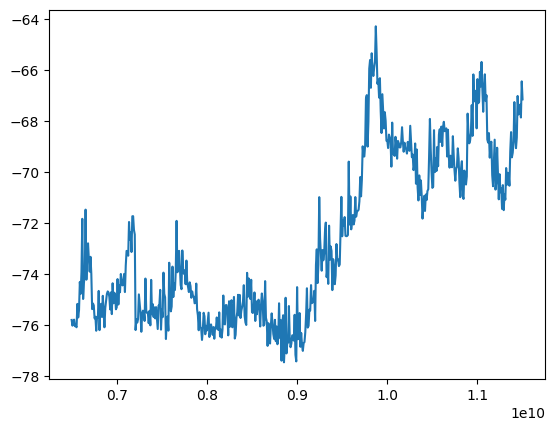

In [11]:
plt.plot(fd[:,0],fd[:,1])

ピーク値を出力させてみます。ピークの定義はpeak_thresholdで設定されます。初期値は10 %ですが，ms2720t.peak_thresholdで変更できます。
minimum_power以上の場合，定義を満たすピークはすべて出力されますが，最大値だけは定義にかかわらず出力されます。

In [12]:
pk  # Tupleのリストを返します。Tupleの1番目が周波数で，2番目が振幅です。

array([[ 9.87272727e+09, -6.43000000e+01]])

アベレージモードでのトレースデータ取得方法。average_count で平均化するsweep数を指定できます。デフォルトは10です。同様にcontinuous_sweepをFalseにする必要があります。

In [13]:
ms2720t.continuous_sweep = False
ms2720t.trace_mode = Ms2720tTraceMode.AVER  # アベレージモード指定
ms2720t.freq_range_set(9e9, 5e9)
ms2720t.resolution_bandwidth = 1e5
ms2720t.average_enable = True
ms2720t.average_count = 10  # アベレージするスイープ回数指定
fd, pk = ms2720t.trace_and_peak_get(minimum_power=-70.0)

あとは同じです。

In [14]:
pk

array([[ 9.86363636e+09, -6.69400000e+01]])

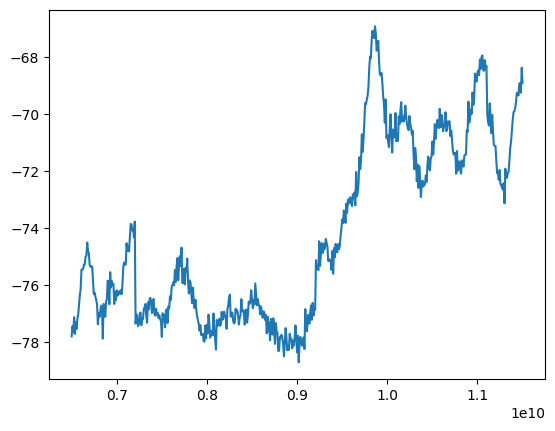

In [15]:
plt.plot(fd[:,0],fd[:,1])